# **Z-score method**
### **REMEMBER THIS METHOD IS ONLY APPLICABLE WHEN THE DATA IS NORMALLY DISTRIBUTED**


The Z-score (or standard score) measures how many standard deviations an observation is from the mean.
It is calculated using the formula: Z = (X - μ) / σ

Where:
- X = individual data point
- μ = mean of the dataset
- σ = standard deviation of the dataset

The **Z-score** (or Standard Score) tells you how many **Standard Deviations ($ \sigma $)** a data point is away from the **Mean ($ \mu $)**.
### 1. The Core Concept
*   **Mean ($ \mu $)**: The average value of your data.
*   **Standard Deviation ($ \sigma $)**: A measure of how "spread out" your data is.
*   **Z-score**: A normalized number that puts everything on the same scale.
    *   **Z = 0**: The point is exactly the average.
    *   **Z = +1**: The point is slightly above average.
    *   **Z = +3**: The point is significantly higher than average (Potential Outlier).

### 2. The Assumption (Important!)
**This method works BEST when your data follows a Normal Distribution (Bell Curve).**
If your data is heavily skewed (like income data), Z-score might give you misleading results.

### 3. The Formula
$$ Z = \frac{X - \mu}{\sigma} $$

Where:
*   $ X $ = The individual data point
*   $ \mu $ = The mean of the column
*   $ \sigma $ = The standard deviation of the column

### 4. How it Detects Outliers

In a normal distribution:
*   **99.7%** of data sits between **-3** and **+3** standard deviations.
*   Anything outside this range is extremely rare.

**The Rule of Thumb:**
*   If **Z-score > 3**: It is an outlier (too high).
*   If **Z-score < -3**: It is an outlier (too low).

*(You can sometimes use thresholds like 2.5 or 3.5 depending on how strict you want to be)*

### 5. Python Example Code
Here is how you would use it in a real project to filter out outliers:
```python
import numpy as np
import pandas as pd
# 1. Create dummy data with an obvious outlier
df = pd.DataFrame({'Age': [25, 26, 28, 29, 27, 24, 26, 120, 25, 23]})
# 2. Calculate Z-scores
# We subtract the mean and divide by std deviation for the whole column
mean = df['Age'].mean()
std = df['Age'].std()
df['Z_Score'] = (df['Age'] - mean) / std
print("Data with Z-Scores:\n", df)
# 3. Filter Outliers (Threshold > 3 or < -3)
# The outlier (120) will likely have a high Z-score
no_outliers = df[(df['Z_Score'] < 3) & (df['Z_Score'] > -3)]
print("\nCleaned Data:\n", no_outliers)


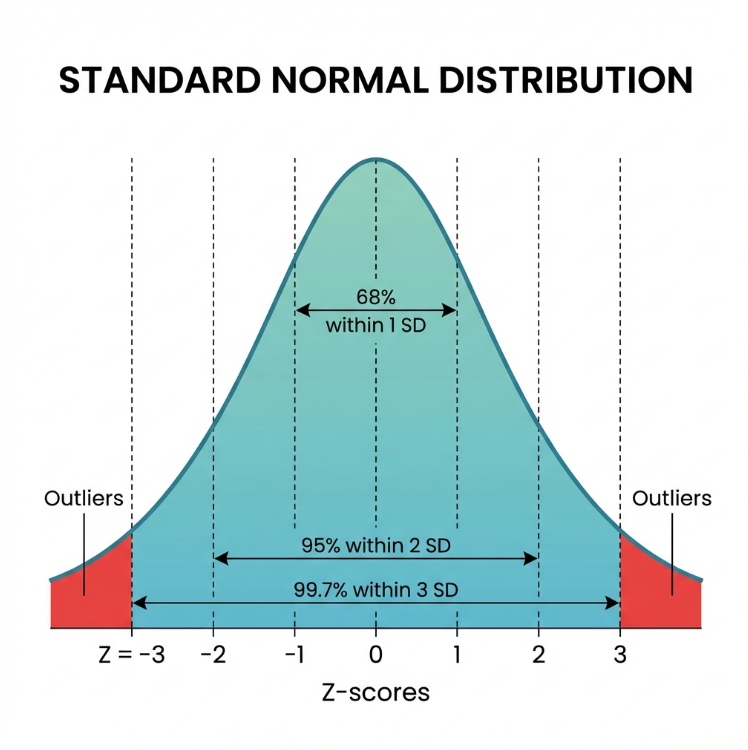


- Mean (0): The center peak. This is where most of your data lives.
- Standard Deviations ($\pm 1, 2, 3$): These lines mark the distance from the mean.
- Outlier Regions (Red): The small tails beyond -3 and +3. Data points falling here are statistically rare and are often considered outliers.





### **How outlier is handled**
1. Trimming
    - Remove the data points that are considered outliers.
    - This is a **simple and effective** way to handle outliers, but it can also lead to **loss of valuable data**.
2. Capping
    - Replace the data points that are considered outliers with a value that is close to the mean.
    - This is a more **complex** way to handle outliers, but it can also lead to **loss of valuable data**.
 

Before using Z-score method, we need to check if the features of the data are normally distributed or not. If they are not normally distributed, we need to apply some transformations to make them normally distributed, or else we can also use other methods to handle outliers (not z-score).

Then you need to find max and min values of the features. Finding the upper and lower bounds of the features. Then use Trimming or Capping as you like

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv('placement.csv')
print(df.isna().mean())     # no missing values 
df.sample(5)

cgpa                    0.0
placement_exam_marks    0.0
placed                  0.0
dtype: float64


,cgpa,placement_exam_marks,placed
916,6.88,11.0,1
824,7.48,27.0,1
45,6.92,10.0,1
343,7.20,70.0,1
819,6.93,10.0,0


<Figure size 2000x400 with 0 Axes>

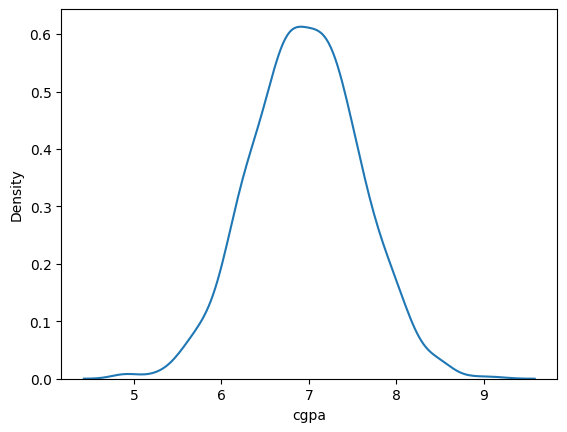

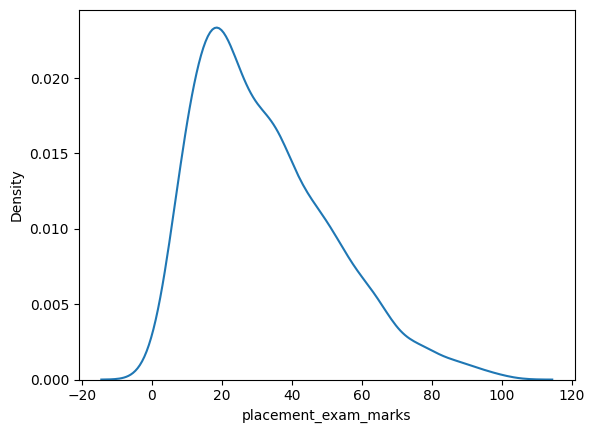

In [6]:
plt.figure(figsize=(20,4))
plt.figure(121)
sns.kdeplot(df['cgpa'])
plt.figure(122)
sns.kdeplot(df['placement_exam_marks'])

plt.show()      # as you can clearly see below that both the features are close to normally distributed

In [7]:
# printing the skewness of both the columns (there is no need to draw graphs everytime)
print(f"SKEWNESS  OF cgpa : {np.round(df['cgpa'].skew(), 4)}")
print(f"SKEWNESS OF placement_exam_marks : {np.round(df['placement_exam_marks'].skew(), 4)}")

SKEWNESS  OF cgpa : -0.0145
SKEWNESS OF placement_exam_marks : 0.8356


- 0: Perfect Symmetry (Normal Distribution).
- Positive (+): The tail is longer on the Right (Right Skewed). Most data is on the left.
- Negative (-): The tail is longer on the Left (Left Skewed). Most data is on the right.

In [8]:
print("Mean value of cgpa : ",df['cgpa'].mean())
print("Std value of cgpa : ",df['cgpa'].std())
print("Min value of cgpa : ",df['cgpa'].min())
print("Max value of cgpa : ",df['cgpa'].max())
print()

print("Mean value of placement_exam_marks : ",df['placement_exam_marks'].mean())
print("Std value of placement_exam_marks : ",df['placement_exam_marks'].std())
print("Min value of placement_exam_marks : ",df['placement_exam_marks'].min())
print("Max value of placement_exam_marks : ",df['placement_exam_marks'].max())

Mean value of cgpa :  6.96124
Std value of cgpa :  0.6158978751323894
Min value of cgpa :  4.89
Max value of cgpa :  9.12

Mean value of placement_exam_marks :  32.225
Std value of placement_exam_marks :  19.13082233892108
Min value of placement_exam_marks :  0.0
Max value of placement_exam_marks :  100.0


## **Type 1 - Doing Manually**

mean + 3 * std dev

In [9]:
# finding the boundary values in cgpa
print(f"HIGHEST VALUE : {df['cgpa'].mean() + 3*df['cgpa'].std()}")
print(f"LOWEST VALUE : {df['cgpa'].mean() - 3*df['cgpa'].std()}")
print()
# finding the boundary values in placement_exam_marks
print(f"HIGHEST VALUE : {df['placement_exam_marks'].mean() + 3*df['placement_exam_marks'].std()}")
print(f"LOWEST VALUE : {df['placement_exam_marks'].mean() - 3*df['placement_exam_marks'].std()}")

HIGHEST VALUE : 8.808933625397168
LOWEST VALUE : 5.113546374602832

HIGHEST VALUE : 89.61746701676324
LOWEST VALUE : -25.167467016763247


In [10]:
# finding the outliers in cgpa
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]       
# these are the outlier students who have cgpa less than 5.11 and still got selected


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [11]:
# finding outliers in placement
df[(df['placement_exam_marks'] > 89.61) | (df['placement_exam_marks'] < -25.16)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


## 

In [12]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
print(new_df.shape)
new_df

(995, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## **Type 2 - Using Z-score**
*(Applicable only if the data is normally distributed)*

In [13]:
# using z-score formula [z = (x-mean)/std dev]
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
df['placement_zscore'] = (df['placement_exam_marks'] - df['placement_exam_marks'].mean()) / df['placement_exam_marks'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore,placement_zscore
0,7.19,26.0,1,0.371425,-0.325391
1,7.46,38.0,1,0.809810,0.301869
2,7.54,40.0,1,0.939701,0.406412
3,6.42,8.0,1,-0.878782,-1.266281
4,7.23,17.0,0,0.436371,-0.795836


In [14]:
# finding outliers in cgpa_zscore

df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore,placement_zscore
485,4.92,44.0,1,-3.314251,0.615499
995,8.87,44.0,1,3.099150,0.615499
996,9.12,65.0,1,3.505062,1.713204
997,4.89,34.0,0,-3.362960,0.092782
999,4.90,10.0,1,-3.346724,-1.161738


In [15]:
# finding outliers in placement_zscore

df[(df['placement_zscore'] > 3) | (df['placement_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore,placement_zscore
9,7.75,94.0,1,1.280667,3.229082
134,6.33,93.0,0,-1.024910,3.176811
162,7.80,90.0,0,1.361849,3.019996
324,6.64,90.0,0,-0.521580,3.019996
630,6.56,96.0,1,-0.651472,3.333626
730,6.14,90.0,1,-1.333403,3.019996
846,6.99,97.0,0,0.046696,3.385897
917,5.95,100.0,0,-1.641896,3.542712


In [16]:
# trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df = df[(df['placement_zscore'] < 3) & (df['placement_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore,placement_zscore
0,7.19,26.0,1,0.371425,-0.325391
1,7.46,38.0,1,0.809810,0.301869
2,7.54,40.0,1,0.939701,0.406412
3,6.42,8.0,1,-0.878782,-1.266281
4,7.23,17.0,0,0.436371,-0.795836
...,...,...,...,...,...
995,8.87,44.0,1,3.099150,0.615499
996,9.12,65.0,1,3.505062,1.713204
997,4.89,34.0,0,-3.362960,0.092782
998,8.62,46.0,1,2.693239,0.720042


<Figure size 2000x400 with 0 Axes>

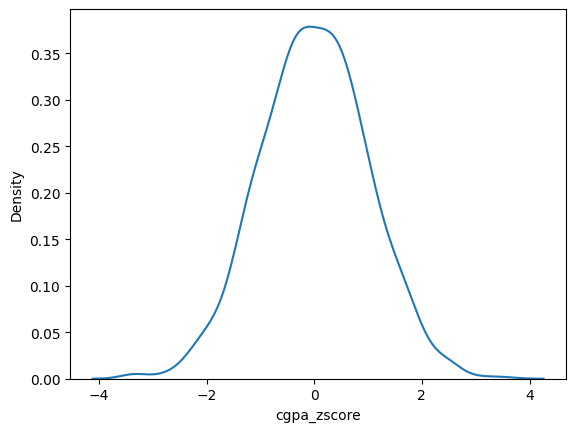

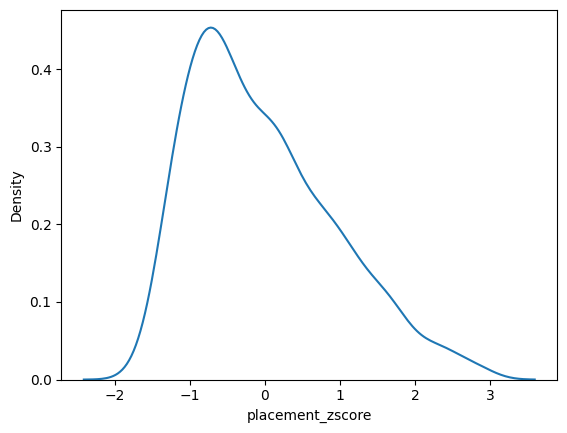

In [17]:
plt.figure(figsize=(20,4))
plt.figure(121)
sns.kdeplot(new_df['cgpa_zscore'])
plt.figure(122)
sns.kdeplot(new_df['placement_zscore'])

plt.show()  

In [18]:
print(f"SKEWNESS  OF cgpa : {np.round(new_df['cgpa_zscore'].skew(), 4)}")
print(f"SKEWNESS OF placement_exam_marks : {np.round(new_df['placement_zscore'].skew(), 4)}")

SKEWNESS  OF cgpa : -0.0185
SKEWNESS OF placement_exam_marks : 0.7241


## **Capping**

In [19]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [20]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit, 
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

df.shape

(1000, 5)

<Figure size 2000x400 with 0 Axes>

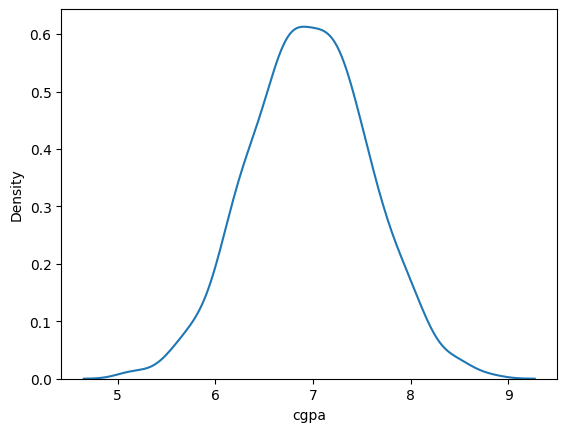

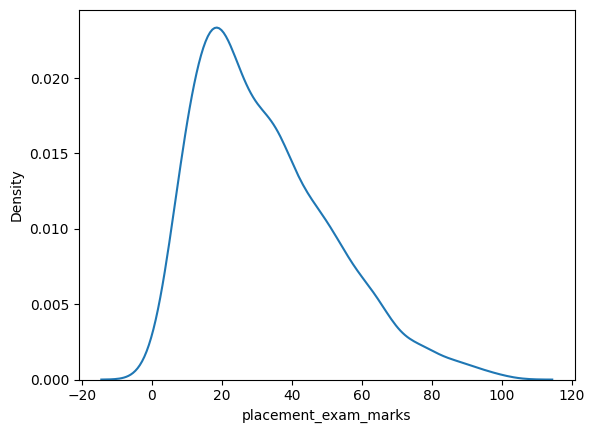

In [21]:
plt.figure(figsize=(20,4))
plt.figure(121)
sns.kdeplot(df['cgpa'])
plt.figure(122)
sns.kdeplot(df['placement_exam_marks'])

plt.show()  

In [22]:
print(f"SKEWNESS  OF cgpa : {np.round(df['cgpa'].skew(), 4)}")
print(f"SKEWNESS OF placement_exam_marks : {np.round(df['placement_exam_marks'].skew(), 4)}")

SKEWNESS  OF cgpa : -0.0037
SKEWNESS OF placement_exam_marks : 0.8356
